# Confidence Interval

## Standardization

Suppose that we have a randomly distributed random variable $\bar{X} \sim N(\mu, \sigma)$. Standardizing a normal distribution is to convert a normal-distibution to the standard normal-distribution defined by $N(\mu = 0, \sigma=1)$. Therefore, we can convert $\bar{X}$ to $\bar{Z}$ as follows:

$$\bar{Z} = \dfrac{\bar{X} - \mu}{\sigma}$$

## Confidence Interval

$\bar{X}$ is our point estimate of the sample mean.

$$\bar{X} \sim N\left(\mu, \sigma^2/N \right)$$

We now stadardize the estimate. We first subtract $\mu$

$$\bar{X} - \mu \sim N\left(0, \sigma^2/N \right)$$

And then divide using the standard deviation $\sigma / \sqrt{N}$

$$\dfrac{\bar{X} - \mu}{\sigma / \sqrt{N}} \sim N\left(0, \sigma^2/N \right)$$

95% confidence interval for a standard normal is defined as follows:

$$-1.96 \le \dfrac{\bar{X}-\mu}{\sigma \sqrt{N}} \le 1.96$$

After rearranging we get:

$$\bar{X} - 1.96\dfrac{\sigma}{\sqrt{N}} \le \mu \le \bar{X} + 1.96\dfrac{\sigma}{\sqrt{N}}$$

In [1]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Download the S&P500 data from Kaggle
od.download("https://www.kaggle.com/datasets/camnugent/sandp500/download?datasetVersionNumber=4")
df = pd.read_csv('./sandp500/all_stocks_5yr.csv', parse_dates=True)
df.head()

Skipping, found downloaded files in "./sandp500" (use force=True to force download)


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [3]:
sbux = df[df['Name'] == 'SBUX']
sbux.insert(len(sbux.columns), 'return', sbux['close'].pct_change(1))
sbux.head()

,date,open,high,low,close,volume,Name,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,-0.005015


In [4]:
values = sbux['return'].dropna().to_numpy()
m = values.mean()
s = values.std(ddof=1)

In [5]:
low = m - 1.96 * s / np.sqrt(len(values))
high = m + 1.96 * s / np.sqrt(len(values))

In [6]:
print(f"Mean of returns: {m}")
print(f"Standard deviation of returns: {s}")
print(f"Skewness of returns: {sbux['return'].skew()}")
print(f"Kurtosis of returns: {sbux['return'].kurtosis()}")
print(f"Confidence interval (returns), low limit: {low}")
print(f"Confidence interval (returns), high limit: {high}")

Mean of returns: 0.0006002332205830914
Standard deviation of returns: 0.012360934026133879
Skewness of returns: -0.2680784195824153
Kurtosis of returns: 5.593158903424731
Confidence interval (returns), low limit: -8.283965370502102e-05
Confidence interval (returns), high limit: 0.001283306094871204


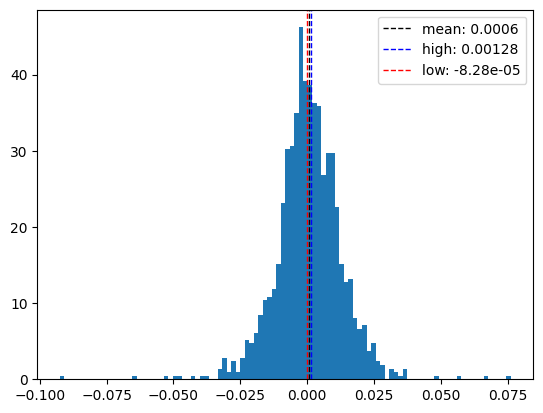

In [7]:
plt.hist(values, bins=100, density=True)
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=1, label=f'mean: {values.mean():0.3}')
plt.axvline(high, color='b', linestyle='dashed', linewidth=1, label=f'high: {high:0.3}')
plt.axvline(low, color='r', linestyle='dashed', linewidth=1, label=f'low: {low:0.3}')
plt.legend()
plt.show()

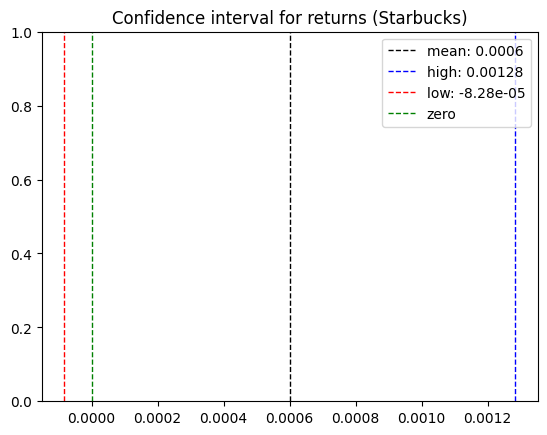

In [8]:
plt.axvline(values.mean(), color='k', linestyle='dashed', linewidth=1, label=f'mean: {values.mean():0.3}')
plt.axvline(high, color='b', linestyle='dashed', linewidth=1, label=f'high: {high:0.3}')
plt.axvline(low, color='r', linestyle='dashed', linewidth=1, label=f'low: {low:0.3}')
plt.axvline(0, color='g', linestyle='dashed', linewidth=1, label=f'zero')
plt.legend()
plt.title('Confidence interval for returns (Starbucks)')
plt.show()